# Introductory applied machine learning (INFR10069)

# Assignment 1: Data analysis and visualisation

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and **submit it electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw1 03_Assignment_1.ipynb`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will overwrite your previous submission**. You can check the status of your submissions with the show_submissions command.

Please note the importance of the number. **This should changed with each assignment!** Also note that submitting again will *overwrite* your previous submission. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
assignment_number=1
local_scp_folder=iamlans
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
server_scp_folder=Downloads
scp -r ${local_scp_folder} ${UUN}@${server_address}:${server_scp_folder}
# rsync -rl ${local_scp_folder} ${UUN}@${server_address}:${server_scp_folder}
ssh ${UUN}@${server_address}
cd Downloads
submit iaml ${assignment_number} iamlans
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
%matplotlib inline

## Description of the dataset

This assignment is based on the 20 Newsgroups Dataset. This dataset is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups, each corresponding to a different topic. Some of the newsgroups are very closely related to each other (e.g. comp.sys.ibm.pc.hardware, comp.sys.mac.hardware), while others are highly unrelated (e.g misc.forsale, soc.religion.christian). 

There are three versions of the 20 Newsgroups Dataset. In this assignment we will use the `bydate` matlab version in which documents are sorted by date into training (60%) and test (40%) sets, newsgroup-identifying headers are dropped and duplicates are removed. This collection comprises roughly 61,000 different words, which results in a bag-of-words representation with frequency counts. More specifically, each document is represented by a 61,000 dimensional vector that contains the counts for each of the 61,000 different words present in the respective document. 

To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We will use documents from only 5 out of the 20 newsgroups, which results in a 5-class problem. More specifically the 5 classes correspond to the following newsgroups: 
1. `alt.atheism`
2. `comp.sys.ibm.pc.hardware`
3. `comp.sys.mac.hardware`
4. `rec.sport.baseball`
5. `rec.sport.hockey `

However, note here that classes 2-3 and 4-5 are rather closely related. Additionally, we computed the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) of each word with the class attribute and selected the 520 words out of 61,000 that had highest mutual information. Therefore, our dataset is a $N \times 520$ dimensional matrix, where $N$ is the number of documents. For very sophisticated technical reasons 1 was added to all the word counts in part A. The resulting representation is much more compact and can be used directly to perform our experiments in Python.

## 1. Exploration of the dataset [40%]

Your first task is to get a feel for the data that you will be dealing with in the rest of the assignment.

### ========== Question 1.1 --- [5 marks] ==========
Load the datasets `train_20news_partA.csv` and `train_20news_partB.csv` into two separate pandas DataFrames.

In [3]:
# Your code goes here
file_A_path = os.path.join(os.getcwd(),'datasets','train_20news_partA.csv')
file_B_path = os.path.join(os.getcwd(),'datasets','train_20news_partB.csv')
news_A = pd.read_csv(file_A_path)
news_B = pd.read_csv(file_B_path)

### ========== Question 1.2 --- [3 marks] ==========
Display basic information for dataset A such as number of columns, type, and memory usage (*hint: pandas dataframes have a built in method for this*) 

In [6]:
# Your code goes here
news_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2256
Columns: 521 entries, w1_aaa to class
dtypes: int64(521)
memory usage: 8.5 MB


### ========== Question 1.3 --- [3 marks] ==========
How many data points and how many attributes are there in the dataset that we can use to model the target variable `class`?

*Your answer goes here*  
There are 2129 data points and 520 attributes available.


### ========== Question 1.4 --- [3 marks] ==========
Use a Pandas method to display the summary statistics for the `news_A` DataFrame.

In [7]:
# Your code goes here
news_A.describe()

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.00000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,5.128229,6.097698,6.120244,5.551902,5.521841,6.12776,5.633161,6.090653,5.970409,5.624706,...,9.666510,9.217473,9.061531,9.398309,9.175200,9.708783,8.807891,9.719587,9.307656,3.092532
std,38.292577,46.190953,46.656022,40.953913,40.978098,45.96434,41.146918,45.762060,44.266628,40.769105,...,45.844064,43.948910,40.969185,43.833064,42.403283,47.294120,39.341038,46.185082,45.059367,1.395948
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,4.000000
max,572.000000,583.000000,579.000000,580.000000,591.000000,600.00000,546.000000,591.000000,578.000000,578.000000,...,590.000000,587.000000,577.000000,598.000000,568.000000,599.000000,585.000000,600.000000,597.000000,5.000000


### ========== Question 1.5 --- [3 marks] ==========
Display the first 7 instances of dataset A.

In [8]:
# Your code goes here
news_A.head(7)

,w1_aaa,w2_pins,w3_kmr,w4_notion,w5_queens,w6_dwyer,w7_defenseman,w8_gld,w9_tocchet,w10_home,...,w512_constantly,w513_generate,w514_definite,w515_lacks,w516_combination,w517_sitting,w518_surface,w519_fashion,w520_sit,class
0,1,1,1,1,1,1,1,1,1,1,...,1,5,3,6,8,4,6,4,8,4
1,1,1,1,1,1,1,1,1,1,1,...,2,3,6,8,3,4,5,6,5,4
2,1,1,1,1,1,1,1,1,1,2,...,4,2,6,5,2,5,5,7,8,2
3,1,1,1,1,1,1,1,1,1,1,...,6,3,6,1,1,8,1,8,4,3
4,1,1,1,1,1,1,1,1,1,1,...,6,1,7,8,6,3,1,8,4,3
5,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,5,7,7,7,2,2
6,1,1,1,1,2,1,1,1,1,1,...,3,6,8,8,3,5,2,1,2,1


### ========== Question 1.6 --- [5 marks] ==========
Display the names of the first 100 attributes in dataset A. 

You might observe that each attribute consists of two parts:
1. `w<x>_` (where x is an index corresponding to each word)
2. the actual name of the word

In [13]:
# Your code goes here
news_A.columns.tolist()[:100]

['w1_aaa',
 'w2_pins',
 'w3_kmr',
 'w4_notion',
 'w5_queens',
 'w6_dwyer',
 'w7_defenseman',
 'w8_gld',
 'w9_tocchet',
 'w10_home',
 'w11_buying',
 'w12_internet',
 'w13_slots',
 'w14_compatible',
 'w15_transfer',
 'w16_baltimore',
 'w17_mean',
 'w18_person',
 'w19_performance',
 'w20_support',
 'w21_tor',
 'w22_gm',
 'w23_mouse',
 'w24_base',
 'w25_population',
 'w26_bob',
 'w27_set',
 'w28_it',
 'w29_earth',
 'w30_faith',
 'w31_steve',
 'w32_caps',
 'w33_printer',
 'w34_east',
 'w35_cable',
 'w36_adapter',
 'w37_mss',
 'w38_catcher',
 'w39_bullpen',
 'w40_obp',
 'w41_innocent',
 'w42_european',
 'w43_angeles',
 'w44_settings',
 'w45_words',
 'w46_rit',
 'w47_shots',
 'w48_ports',
 'w49_vga',
 'w50_coverage',
 'w51_jumpers',
 'w52_bases',
 'w53_sea',
 'w54_pts',
 'w55_behavior',
 'w56_domi',
 'w57_sabres',
 'w58_yzerman',
 'w59_messier',
 'w60_goalies',
 'w61_hawks',
 'w62_our',
 'w63_sx',
 'w64_view',
 'w65_hitters',
 'w66_richard',
 'w67_point',
 'w68_nyi',
 'w69_mvp',
 'w70_kill',


### ========== Question 1.7 --- [4 marks] ==========
Familiarise yourself with the [`stripplot`](https://seaborn.github.io/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot) function in `seaborn`. Pick one attribute of your choice (except `class`) and display a stripplot for that attribute for dataset A. Demonstrate the distribution of the data separately for each class (by making appropriate use of the `x` argument in `stripplot`). Set the `jitter` argument to `True` and the `alpha` argument to an appropriate value (to add transparency). When the jitter parameter is enabled a small amount of noise is added to the data so that there is less overlap and the distribution is easier to visualise.

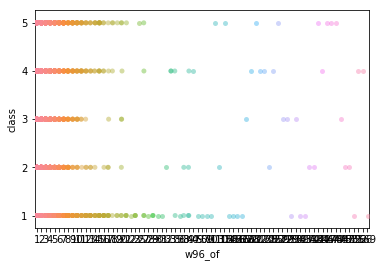

In [196]:
# Your code goes here
sns.stripplot(x="w96_of", y="class", data=news_A, jitter=True, alpha=0.45)

### ========== Question 1.8 --- [4 marks] ==========
The stripplot illustrates the distribution of a single attribute. We can also visualise the joint distribution of two variables by using a scatter plot. Again, we want to add a bit of noise into the data so that is easier to see which parts of the space (2-dimensional in our case) have larger probability densities. 

For this, you will be using the function `scatter_jitter` provided below. This function takes as input two numpy arrays containing the features of interest. Pick two attributes of your choice from dataset A and use the provided function to plot their joint distribution. You can play around with the amount of noise added by tweaking the `jitter` parameter. Alternatively, you can just use its default value which is set to 0.2.

In [6]:
def scatter_jitter(arr1, arr2, jitter=0.2):
    """ Plots a joint scatter plot of two arrays by adding small noise to each example. 
    Noise is proportional to variance in each dimension. """
    arr1 = np.asarray(arr1)
    arr2 = np.asarray(arr2)
    arr1 = arr1 + jitter*arr1.std(axis=0)*np.random.standard_normal(arr1.shape)
    arr2 = arr2 + jitter*arr2.std(axis=0)*np.random.standard_normal(arr2.shape)
    plt.scatter(arr1, arr2, marker=4)

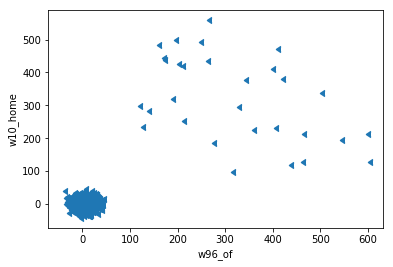

In [12]:
# Your code goes here
scatter_jitter(news_A['w90_record'],news_A['w10_home'],jitter=0.3)
plt.xlabel('w96_of')
plt.ylabel('w10_home')


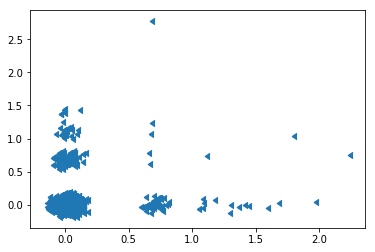

In [14]:
scatter_jitter(np.log(news_A_clean['w90_record']),np.log(news_A_clean['w10_home']),jitter=0.3)

### ========== Question 1.9 --- [7 marks] ==========
From the strip and scatter plots above you might observe that there is something peculiar about the data. Indeed most attributes take very small values (usually in the range 1-10) but there are some data points (i.e. rows) in the dataset where the attributes take very large values. These data points are called [outliers](https://en.wikipedia.org/wiki/Outlier).

You might think that the presence of outliers in the dataset has been a resut of noise contamination (you wouldn't expect the same word to appear 600 times within an e-mail, would you?). Your job now is to create a new dataset from dataset A (name it `news_A_clean`) and remove the outliers. Create some metric to find the outliers and check that your metric is reasonable. Be careful not to alter the original `news_A`...we may require it in its dirty format later...

## Find the outliers
** 1. Get a general information of the attributes. **  
Check the possible outlier with different word count threshold (100,200,300,400,500,600), and print their total amounts. 
    
    n=0
    for i,x in news_A.iterrows():
        if x.max()>100 or sum(x)>1000:
            print(i,x.idxmax(), ", ",x.max(), ", ",round(news_A[x.idxmax()].mean(),1),'Sum of words in email', sum(x))
            n+=1      
    print(n) 

* The observes {word count threshold : posisble outlier documents amount} is {100:38, 200: 32, 300: 31, 400: 30, 500: 30, 600: 23}  
* Even though the selected 520 features words do not cover all the words types in these documents, they are still the frequent words. So the features words' total amounts in each document could tell us the approximate size of the document. 
* Document with any single word counts more than 500, their size are tremendous large (total words > 170,000).

** 2. Extreme Value Analysis**
* For document with any single word counts more than 500, their size are tremendous large (total words > 170,000). Since it is quite unusual for the same word to appear 600 times within an e-mail (also the documents words size). So these are counted as outlier!
* Besides, there are 5 documents of which the "of"s counts seems a little bit large (appear once in every 11-15 words), which possibly be outlier.  

2.1 Visualizing the "of" attributes:  
    `sns.distplot(news_A['w96_of'],rug=True)`  
    Intuitively, there is threshold in value 100 which distinguish two kind of values, documents with "of" counts larger than 100 is suspectable as outlier.   
2.2 Assume a distribution (Gaussian) and look for values more than 3 standard deviations from the mean   
    
    
    n=0
    for i,x in news_A.iterrows():
        z_score = (x.max()-news_A[x.idxmax()].mean())/ news_A[x.idxmax()].std()
        if z_score>3:
            print(i,x['class'],x.idxmax(), ", ",x.max(), 
                  ", mean:",round(news_A[x.idxmax()].mean(),1),
                  ',z-score:', z_score,
                  ',Sum of words in email', sum(x))
            n+=1      
    print(n)  
  
It turns out that there are 35 possible outlier, which could be treated as two groups:   
   * First is the 30 documents which are those already been defined as outlier(attributes value > 500). 
   * The rest 5 documents are exactly the 5 documents mentioned above with large value for the "of" attribute (values all larger than 100)! 
    
** 3. Conclusion：**  
With the above three steps of analysis in different angle which reach an integrated conclusion (even not mathematically strictly) :   
An outlier here was defined to be a document contains any single attribute with value more than 3 standard deviations from its own mean(z-score>3).

123 5 w70_kill ,  600 , mean: 6.8 ,z-score: 11.5734713291 ,Sum of words in email 183411
159 2 w70_kill ,  600 , mean: 6.8 ,z-score: 11.5734713291 ,Sum of words in email 180499
196 5 w115_early ,  599 , mean: 6.2 ,z-score: 12.9002136683 ,Sum of words in email 183475
222 4 w325_data ,  600 , mean: 5.7 ,z-score: 13.815666475 ,Sum of words in email 182783
242 1 w244_wingate ,  599 , mean: 6.4 ,z-score: 12.0437955679 ,Sum of words in email 178461
476 5 w107_john ,  600 , mean: 5.7 ,z-score: 14.2747371405 ,Sum of words in email 183619
539 4 w378_simms ,  600 , mean: 6.3 ,z-score: 12.6396874979 ,Sum of words in email 184846
558 1 w96_of ,  156 , mean: 9.6 ,z-score: 3.35109699015 ,Sum of words in email 2332
559 4 w326_potvin ,  600 , mean: 6.3 ,z-score: 12.5258178063 ,Sum of words in email 179550
576 2 w157_fact ,  600 , mean: 5.8 ,z-score: 13.8444251439 ,Sum of words in email 182467
594 3 w144_via ,  597 , mean: 5.4 ,z-score: 14.5072017587 ,Sum of words in email 182614
746 3 w42_european ,  6

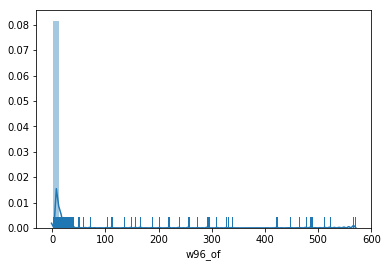

In [8]:
# Your code goes here
# Detect and save the index of outliers
n=0
is_outlier_index = []
for i,x in news_A.iterrows():
    z_score = (x.max()-news_A[x.idxmax()].mean())/ news_A[x.idxmax()].std()
    if z_score>3:
        print(i,x['class'],x.idxmax(), ", ",x.max(), 
              ", mean:",round(news_A[x.idxmax()].mean(),1),
              ',z-score:', z_score,
              ',Sum of words in email', sum(x))
        n+=1
        is_outlier_index.append(i)       
print(n) 
print(is_outlier_index)
######################################################################################################################################
sns.distplot(news_A['w96_of'],rug=True)

######################################################################################################################################
# Create new data set: exclude outlier from raw data 
news_A_clean = news_A.drop(is_outlier_index,axis=0)

### ========== Question 1.10 --- [3 marks] ==========
Write code to return the number of data points in the clean dataset, and the number of documents that have been excluded as outliers

In [207]:
# Your code goes here
print('The number of data points in the clean dataset is:   ', news_A_clean.shape)
print('the number of documents that have been excluded as outliers is:   ', len(is_outlier_index))

The number of data points in the clean dataset is:    (2094, 521)
the number of documents that have been excluded as outliers is:    35


## 2. Naive Bayes classification [60%]
Now we want to fit a Gaussian Naive Bayes model to the cleaned dataset A. You might want first to familiarise yourself with the [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class in `Sklearn`.

### ========== Question 2.1 --- [4 marks] ==========

By using the `scatter_jitter` function provided above, display a scatter plot of the features `w281_ico` and `w273_tek` for the cleaned dataset A. Set the jitter value to something small (e.g. 0.1). Label axes appropriately.

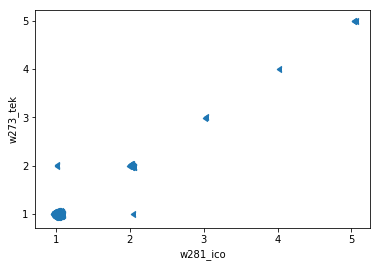

In [208]:
# Your code goes here
scatter_jitter(news_A_clean['w281_ico'],news_A_clean['w273_tek'],jitter=0.1)
#plt.scatter(news_A_clean['w281_ico'], news_A_clean['w273_tek'], marker=4)
plt.xlabel('w281_ico')
plt.ylabel('w273_tek')

### ========== Question 2.2 --- [6 marks] ==========
What do you observe?   
  
How does that relate to the Naive Bayes assumption?   
       
What would be the main issue we would have to face if we didn't make this assumption?  
    


*Your answer goes here*  
**Q1:   
The two variables are not independent with each other** 

**Q2:   
The Naive Bayes assumes that features are conditional independence given the label. Yet here we could observe that features w281_ico and w273_tek are acutally dependence. Which means that if we use Naive Bayes as classifier here, we may get the wrong result. Despite the fact that the 520 features are the best we could have in this task.   **  

**Q3:   
The main issue if we didn't make the Naive Bayes assumption is that we would have to estimate a full covariance matrix of size 520 X 520 (i.e. ~270400 parameters) and we only have 2097 samples, which is quite not large enough compared to the features. So the covariance estimate might be dominated by noise. Assuming conditional independence allows us to esimate a diagonal covariance matrix i.e. estimate a variance for each variable independently and assume all covariances between distinct variables are 0.**

### ========== Question 2.3 --- [5 marks] ==========
Fit a Gaussian Naive Bayes model to the cleaned dataset A. Your input features should be all the attributes in the dataset except the `class` attribute which will be your target. Display the classification accuracy on the training dataset.

In [4]:
# Your code goes here
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
X_clean = news_A_clean.drop('class', axis=1)
y_clean = news_A_clean['class']
clf_clean = GaussianNB()
clf_clean.fit(X=X_clean,y=y_clean)
pred_clean = clf_clean.predict(X_clean)
ca = clf_clean.score(X_clean,y_clean)
ca

0.879178605539637

### ========== Question 2.4 --- [5 marks] ==========
Plot the (normalised) confusion matrix for the training data. Label axes appropriately.

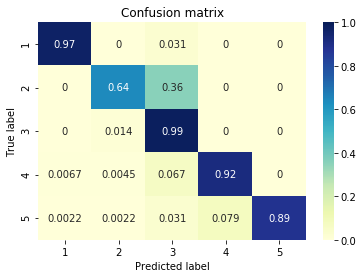

In [5]:
# Your code goes here
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True,cmap="YlGnBu" )
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm_clean = confusion_matrix(y_clean, pred_clean)
cm_clean_norm = cm_clean/cm_clean.sum(axis=1)[:, np.newaxis]
plt.figure()
#plot_confusion_matrix(cm_norm,classes=['1.alt.atheism', '2.comp.sys.ibm.pc.hardware','3.comp.sys.mac.hardware','4.rec.sport.baseball','5.rec.sport.hockey'])
#plot_confusion_matrix(cm_clean_norm,classes=['1','2','3','4','5'])
plot_confusion_matrix(cm_clean_norm,classes=clf_clean.classes_)

### ========== Question 2.5 --- [3 marks] ==========

Comment on the confusion matrix from the previous question. Does it look like what you would have expected? Explain.

*Your answer goes here*
* Most of the correct predictions located in the diagonal of the table is as expected.  
* Except for class 2, with a poor performance compared to the other classes.
* There is also an relatively outsanding prediction error with 0.36 in cm(2,3), which indicates the error of class 2 news being predicted as class 3.

### ========== Question 2.6 --- [5 marks] ==========
Fit a Gaussian Naive Bayes model to the original dataset A (including the outliers). Display the classification accuracy on the training dataset.

0.205260685768


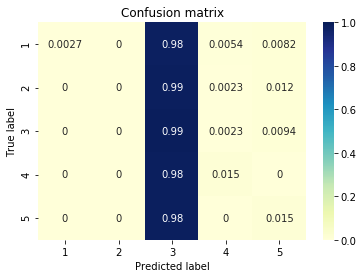

In [216]:
# Your code goes here
X = news_A.drop('class', axis=1)
y = news_A['class']
clf = GaussianNB()
clf.fit(X=X,y=y)
pred = clf.predict(X)
#ca = accuracy_score(y, pred) 
ca = clf.score(X,y)
print(ca)
cm = confusion_matrix(y, pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
#plot_confusion_matrix(cm_norm,classes=['1.alt.atheism', '2.comp.sys.ibm.pc.hardware','3.comp.sys.mac.hardware','4.rec.sport.baseball','5.rec.sport.hockey'])
plot_confusion_matrix(cm_norm,classes=['1','2','3','4','5'])


### ========== Question 2.7 --- [4 marks] ==========
Comment on the above results (Questions 2.3 & 2.6). In particular explain why you think that cleaning the data helps in this case.

*Your answer goes here*
* In Q2.3, we acquire accuracy around 0.88. Yet in Q2.6, it is just 0.205. 
* In particular, in Q2.6, except class 3, all the other classes's correct prediction accuracy are quite terrible(no more than 1.5%). Yet the correct prediction accuracy in Q2.3 are approximatly 89%-99% (except one less than 70%). 
* Besides, in Q2.6, the false negatives and false positives related to class 3 are so high. Actually, that means almost all of the test samples were predicted as class 3. 
* In addition, in Q2.6, no test sample was predicted as class 2. As we all know, class 2.comp.sys.ibm.pc.hardware and class 3.comp.sys.mac.hardware are quite similar. By cleaning the data, Q2.3 could apparently improve the classification between class 2 and class 3.
* So obviously cleaning the data could provide a significant improvement in the prediction accuracy.

### ========== Question 2.8 --- [5 marks] ==========

Now we want to evaluate the generalisation of the classifier on new (i.e. unseen data). Use the classifier you trained in Question 2.5 (i.e. on the cleaned dataset) and test its performance on dataset `train_20news_partB`. 

Display the (normalized) confusion matrix and the classification accuracy on the Dataset B.

0.828125


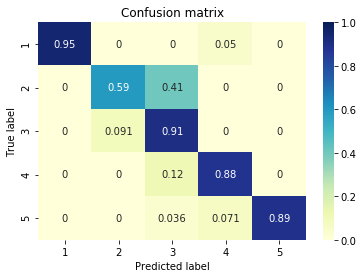

In [217]:
# Your code goes here
test_B = news_B.drop('class', axis=1)
label_B = news_B['class']
pred_B = clf_clean.predict(test_B)
ca_B = clf_clean.score(test_B,label_B)
print(ca_B)
cm_B = confusion_matrix(label_B, pred_B)
cm_B_norm = cm_B/cm_B.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_B_norm,classes=['1','2','3','4','5'])

### ========== Question 2.9 --- [4 marks] ==========

Comment on the results from the previous question. Do you think this is an acceptable level of performance? Which are the easiest and most difficult classes to predict correctly? 

*Your answer goes here*   

* Q1. This is an acceptable performance. Because:
    * The prediction of class 1 is quite successful, as class 1 is relatively isolated topic compared with the other classes.
    * Prediction of class 2 and 3 are less well performed, since the class 2 and class 3 are quite similar, so to classify between them is very difficult, so as the class 4 and class 5 pair.  


* Q2. As the confusion matrix shows with statements above, the class 1 is the easiest while class 2 is the most difficult class to predict.

### ========== Question 2.10 --- [4 marks] ==========
What is a reasonable baseline against which to compare the classiffication performance? *Hint: What is the simplest classiffier you can think of and what would its performance be on this dataset?* 

*Your answer goes here*  

A reasonable baseline could be the simplest classiffier here: select the class that has the most observations and simply use that class as the result for all predictions. 
* Choose the sklearn.metrics.accuracy_score as measurement
* Find out the most observations in dataset, which turns out to be class 4
* Predict all training samples as class 4
* Calculate the accuracy score of this classification. Which is 0.213.
* Use the score as the base line. Recall that the score of GaussianNB classifier on cleaned data is 0.88, which is higher than base line.


### ========== Question 2.11 --- [4 marks] ==========

Estimate the baseline performance.

In [218]:
# Your code goes here
from collections import Counter
#from sklearn.dummy import DummyClassifier
print(Counter(y_clean))
y_clean.shape[0]
base_line = np.ones(y_clean.shape[0])*4
print('Estimated baseline performance:  ',accuracy_score(y_clean, base_line))


Counter({4: 447, 5: 445, 3: 422, 2: 421, 1: 359})
Estimated baseline performance:   0.213467048711


### ========== Question 2.12 --- [3 marks] ==========

Execute the cell below to get the prediction on the test dataset by using a different classifier which we will be introducing in this class later on. By using this prediction provided below (`rf_prediction`) plot the confusion matrix and display the classification accuracy on the test dataset. *Important: Make sure the test dataset is loaded in a DataFrame called `news_B` otherwise execution will return an error. In that case replace the DataFrame name in the third line.*

0.921875


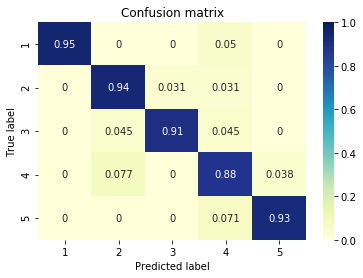

In [281]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50).fit(X=news_A_clean.drop("class", axis=1), y=news_A_clean["class"])
X_ts = news_B.drop('class', axis=1)
rf_prediction = rf.predict(X=X_ts)
# Your code goes here
ca_rf = rf.score(X_ts,label_B)
print(ca_rf)
cm_rf = confusion_matrix(label_B, rf_prediction)
cm_rf_norm = cm_rf/cm_rf.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_rf_norm,classes=['1','2','3','4','5'])

### ========== Question 2.13 --- [8 marks] ==========

Which classifier (Naive Bayes or Random Forest) would you trust if you had to choose? What are the reasons you believe the Gaussian Naive Bayes classifier does not perofm so well in this particular problem? You are not expected to justify the performance level achieved by the Random Forest classifier. Feel free to use code and plots to illustrate your points.

*Your answer goes here*  

* Here random forest classifier is more trustable.
* The reason that Gaussian NB classifier does not perform well here is that the dataset itself disobey the Naive Bayes assumption. 
* As the description of the dataset shows that the 520 words are selected as features out of 61,000 words, based on the fact that they have the highest mutual information among each 
* As we could see in Q2.1, two features are kind of linear dependency regardless of a given label or not. Actually, many features of the dataset are highly co-related with each other. 
* Because the dataset already break the Naive Bayes assumption. It means applying Naive Bayes classification here is mathematically wrong, despite the fact that it could still achieve an acceptable accuracy. 

w46_rit w81_ultb 0.993652962174
w81_ultb w46_rit 0.993652962174
w104_saturn w105_wwc 1.0
w105_wwc w104_saturn 1.0
w273_tek w281_ico 0.982320527826
w276_buphy w302_jaeger 0.993426207059
w281_ico w273_tek 0.982320527826
w300_bobbe w301_beauchaine 1.0
w301_beauchaine w300_bobbe 1.0
w302_jaeger w276_buphy 0.993426207059
w398_wpd w404_solntze 0.988627909675
w404_solntze w398_wpd 0.988627909675
w404_solntze w413_livesey 0.987276073544
w413_livesey w404_solntze 0.987276073544
High coefficient related pair numbers：  74


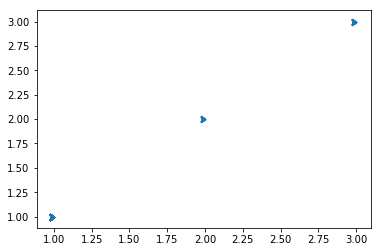

In [283]:
# Your code goes here
#  Find all of the high coefficient related  atrributes pairs
from scipy.stats.stats import pearsonr
plt.scatter(news_A_clean['w104_saturn'], news_A_clean['w105_wwc'], marker=5)
n=0
for col_a in news_A_clean:
    for col_b in news_A_clean:
        if col_a != col_b:
            cr,p = pearsonr(news_A_clean[col_a],news_A_clean[col_b])
            if cr >= 0.8:
                n+=1
                if cr> 0.98:
                    print(col_a,col_b,cr)
print('High coefficient related pair numbers： ',int(n/2))
